# Tarea Redes Neuronales
## Grupos de 3 personas
### Entregas atrasadas pierden 1 punto por hora. Si alguien entrega a las 00:00:01 implica que pierde 1 punto en la nota final. Recomendación, entregue una versión inicial cerca de las 22 horas y luego suba las modificaciones.

La NASA mantiene la información de varios cometas y quiere determinar alguna manera de predecir el diametro de un cometa. Específicamente, han analizado en forma manual una muestra de 100,000 asteroides. Los datos consisten en 26 variables, con distinta información como por ejemplo nombre del asteroide, su periodo orbital, su periodo de rotación, etc. Todos los datos existentes, se encuentran en un puro archivo llamado asteroidTrain.csv. Mientras que las descripciones de cada una de las variables se encuentran en el archivo tareaInformacion.txt

Desafortunadamente, la NASA todavía no ha evaluado 37.681 asteroides y no tienen tiempo para realizarlo. Por lo mismo, le piden que aplique una red neuronal feed forward para obtener una predicción de estos asteroides.

1. Lea los datos y borre las variables/asteroides que estime necesario. En caso que crea que la base de datos todavía es demasiado grande para aplicar una red neruonal, usted puede tomar una muestra de la misma. NOTA, justifique cada una de las decisiones tomadas, el puntaje principal se basa en las justificaciones. Una vez generado estos datos, guarde la base de datos final en un nuevo archivo csv (1.5 puntos).
2. Entrene un modelo feed forward. Realice una busqueda de hiperparámetros incluyendo número de capas, número de  neuronas, funciones de activación, epocas, etc. Seleccione un modelo final (justificando a través de una evaluación correcta los hiperarametros seleccionados (2.5 puntos). NOTA, justifique cada una de las decisiones tomadas, el puntaje principal se basa en las justificaciones. 
3. Utilice el modelo seleccionado en el punto anterior y evalue los 37,681 asteroides que la NASA no ha evaluado. En este proceso genere un archivo csv de una sola columna con 37,681 filas donde cada celda tendrá el valor del cometa a predecir (2 puntos). Atención, si ustedes entrega un archivo con un número distinto de filas, de igual manera se evaluará las 37,681 filas.

El punto de evaluación final será una competencia entre todas las tareas basados en los MSE más bajos y altos obtenido por cada grupo. El puntaje final será una regresión lineal entre un modelo muy básico y el mejor puntaje.

Para esta entrega usted deberá entregar 4 archivos
1. Un archivo ipynb que muestre todo el proceso de selección de variables y limpieza de datos aplicados. Además, deberá mostrar la búsqueda de hiperparametros. Este archivo ya deberá haber sido ejecutado y cuando se cargué uno debera ver todo el proceso de ejecución. 
2. Un nuevo archivo CSV que contenga la base de datos luego de la limpieza generada en el primer punto de la tarea.
3. Un archivo ipynb limpio que simplemente cargue la nueva base de datos, entrene el modelo con los hiperparametros seleccionados y genere el archivo csv con las 37,681 estimaciones. Este archivo permitirá ver la replicabilidad de su archivo csv. 
4. Un archivo csv con las 37,681 estimaciones realizadas para el modelo.

In [10]:
import numpy as np
import pandas as pd
import scipy
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
dataEval = pd.read_csv ("./data/asteroidEval.csv")
dataTrain_bruto = pd.read_csv ("./data/asteroidTrain.csv")

# El archivo tiene 100.000 filas, de las cuales solo usaremos 10.000 para el entrenamiento. --------------- cambia "." por ""
dataTrain = dataTrain_bruto.replace(".", "").sample(10000, random_state=2)

# Primero, se eliminaron las variables que estaban vacias.
del(dataTrain['G'])
del(dataTrain['extent'])
del(dataTrain['rot_per'])
del(dataTrain['GM'])
del(dataTrain['BV'])
del(dataTrain['UB'])
del(dataTrain['IR'])
del(dataTrain['spec_B'])
del(dataTrain['spec_T'])
del(dataTrain['neo'])
del(dataTrain['pha'])

# Luego eliminamos:
del(dataTrain['condition_code']) # no es necesario saber qué tan bien se conoce la órbita de un objeto.
del(dataTrain['n_obs_used']) # no es necesario saber que tantas observaciones se usaron.
del(dataTrain['full_name']) # no es necesario saber el nombre

#print(dataTrain.to_string())
dataTrain['diameter'] = dataTrain['diameter'].str.replace('.','').astype(np.float64)
# dataTrain.dtypes

dataTrain = dataTrain.dropna()

C:\Users\satel\AppData\Local\Temp/ipykernel_13736/1634889206.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
C:\Users\satel\AppData\Local\Temp/ipykernel_13736/1634889206.py:2: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
C:\Users\satel\AppData\Local\Temp/ipykernel_13736/1634889206.py:26: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


<AxesSubplot:>

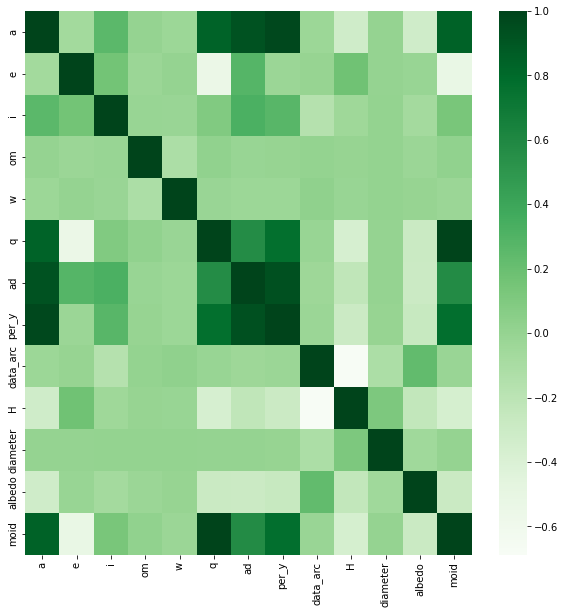

In [12]:
plt.figure(figsize=(10,10))
correlation = dataTrain.corr()
sns.heatmap(correlation,cmap='Greens')

In [13]:
# def train(X, y, hidden_layer_size, learning_rate, epochs):
#     # normalizamos los datos
#     scaler = StandardScaler()
#     X = scaler.fit_transform(X) # no hay que pasar el nombre
#     y = scaler.fit_transform(y)

#     # creamos la red neuronal
#     mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_size,
#                        activation='relu',
#                        solver='adam',
#                        learning_rate_init=learning_rate,
#                        max_iter=epochs,
#                        verbose=True)
#     mlp.fit(X, y)
#     return mlp

# X = dataTrain.dropna()
# y = X['diameter'].astype(float)
# mlp = train(X, y, hidden_layer_size=(100,), learning_rate=0.001, epochs=100)

In [14]:
x = dataTrain.drop("diameter", axis=1)

y = dataTrain["diameter"]
print(y)
print("-"*30)
print(x)

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.20, random_state=42)

50680    2.179000e+16
49224    4.592000e+03
65153    5.938000e+03
52340    3.179000e+03
35645    4.169000e+03
             ...     
47454    3.405000e+03
63771    2.380000e+02
60896    3.480000e+02
33540    8.621000e+03
44359    4.380000e+02
Name: diameter, Length: 3264, dtype: float64
------------------------------
              a         e          i          om           w         q  \
50680  2.233296  0.214207   4.849435  120.898455  173.050813  1.754908   
49224  3.068338  0.134944   9.440404  227.247710  122.701700  2.654284   
65153  3.104391  0.091432   2.147292  335.481142   23.773316  2.820551   
52340  2.675033  0.167338  12.631265   14.423147  277.183146  2.227400   
35645  3.034970  0.090936  11.044894   52.801940  342.061933  2.758981   
...         ...       ...        ...         ...         ...       ...   
47454  3.017408  0.198534   9.109797   73.259909  349.580059  2.418351   
63771  2.843273  0.205950   5.603790   43.410717  320.082612  2.257700   
60896  2.565484 

In [20]:
from sklearn import metrics as mt

# scaler = StandardScaler().fit(xTrain, yTrain)

# xRTrain = scaler.transform(xTrain)

# mlpmodel = MLPRegressor().fit(xRTrain, yTrain)

# predict = mlpmodel.predict(xTest)

# print(r2_score(yTest, predict))

# error = mean_squared_error(yTest, predict)
# print(np.sqrt(error))

params = {
    "hidden_layer_sizes": [(20, 20), (10, 10), (100, 200, 150), (300, 200, 250)],
    "activation": ["relu", "logistic"],
    "solver": ["lbfgs", "sgd", "adam"],
    # batch_size auto
    "batch_size": [10, 20, 50, 100],
    "learning_rate_init": [0.01, 0.001, 0.0001],
    "max_iter": [100, 500, 1000],
}

#cv = GridSearchCV(mlpmodel, params, cv=10, n_jobs=-1).fit(xRTrain, yTrain)
#print(cv.best_params_)

mlp = MLPRegressor(hidden_layer_sizes=(3, 4), activation='relu', solver='adam', batch_size='auto', learning_rate_init=0.001, max_iter=200)
mlp.fit(xTrain, yTrain)
print("training done")
train_score = mlp.score(xTrain, yTrain)
print("Training score: %.2f" % train_score)

prediction = mlp.predict(xTest)
print("prediction done")

r2 = mt.r2_score(yTest, prediction)
error = mean_squared_error(yTest, prediction)
print(f"r2: {r2}")
print(f"mean_squared_error: {np.sqrt(error)}")
# : {np.sqrt(error)}")
# prediction = mlp.predict(xRTrain)
# AccTest =mt.accuracy_score(yTrain, prediction)
# R2CV = cross_val_score(mlptuned, xTest, yTest, cv=10, scoring="r2").mean()
# print(f"R2CV: {R2CV}")


training done
Training score: -0.19
prediction done
r2: -0.16076668109840764
mean_squared_error: 1.773394302642703e+32


c:\Users\satel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


In [16]:
xTrain
# # save it on a txt file
# np.savetxt("predictions.txt", predicttuned, delimiter=",")

,a,e,i,om,w,q,ad,per_y,data_arc,H,albedo,moid
54575,3.030715,0.207545,5.941795,236.545149,326.538963,2.401705,3.659724,5.276255,23013.0,13.2,0.100,1.401060
56324,2.309906,0.227351,3.987392,190.849465,161.453251,1.784746,2.835066,3.510748,13919.0,15.0,0.316,0.779123
35413,2.685397,0.066097,13.215369,266.429281,206.923582,2.507900,2.862895,4.400693,6684.0,15.2,0.286,1.530850
39240,3.208056,0.081941,8.847328,258.664356,126.225857,2.945184,3.470927,5.746071,4898.0,15.7,0.031,1.960440
47564,2.328619,0.078960,7.524614,52.851222,20.249528,2.144752,2.512487,3.553497,7170.0,14.8,0.437,1.160340
...,...,...,...,...,...,...,...,...,...,...,...,...
47510,2.200066,0.117687,5.280346,95.517657,322.935316,1.941146,2.458986,3.263336,7386.0,16.2,0.230,0.956380
41731,3.083310,0.169658,10.391509,243.701194,248.746188,2.560201,3.606419,5.414197,7168.0,15.7,0.042,1.597650
39267,2.784301,0.078643,14.286580,97.025019,57.269240,2.565336,3.003266,4.646036,7121.0,14.4,0.464,1.607570
36776,2.741070,0.083144,4.900335,226.280099,139.211997,2.513166,2.968974,4.538250,13145.0,14.7,0.085,1.513320


In [17]:
# print the test data
print(prediction)

[ 7169595.07117719  3071656.22007324  2925064.49607994  7942821.03441763
  2120664.5103559   3242466.25422103  3013165.8214234   3681104.88167975
  2394238.42864308  2502831.2998657   3439932.93177124  2161938.0030029
  3792200.23375454  2344732.75223904  5266754.82752518  2520886.52341737
  2229449.59934057  3115650.98036956  2189912.58758801  3164441.15709496
  5177407.1026961   3395480.42148432  3478468.53995086  2564736.75975343
  2425807.5204458   1535012.62974253  3153895.8597742   1365290.03067938
  2987242.94316289 14028330.22884891  2535906.78548928  2306469.35739111
  2908342.89947742  8514998.94718127  2499916.75539501  2288689.17269087
  2549557.39245169  2078003.0838815   7344498.7480994   2692490.83354256
  3087363.33461466  2824531.24751267  2745687.48729352  3483091.56071811
  3130513.3568884   2371840.76729757  1799222.19182314  3946650.68018071
  2300297.55146362  1969103.19744839  2379990.1896486   4280602.52640802
  2958806.05123436  2102317.71763971  2117645.612664

In [18]:
yTest


34540    1.807000e+03
65156    5.455000e+03
50766    3.500000e+03
58729    4.395000e+03
43939    3.718000e+03
             ...     
65008    2.649000e+16
41095    2.968000e+03
62995    2.569000e+03
35516    2.149000e+03
43205    1.607000e+03
Name: diameter, Length: 653, dtype: float64